In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #pyplot used when we want to plot nos
from matplotlib import style
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sweetviz

In [53]:
#1. Import a 311 NYC service request.
Customer_data1=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
Customer_data=Customer_data1.copy()

In [3]:
def missing_values_table(Customer_data):
        mis_val = Customer_data.isnull().sum()
        mis_val_percent = 100 * Customer_data.isnull().sum() / len(Customer_data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(Customer_data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


In [4]:
missing_values_table(Customer_data)

Your selected dataframe has 53 columns.
There are 35 columns that have missing values.


,Missing Values,% of Total Values
School or Citywide Complaint,300698,100.0
Vehicle Type,300698,100.0
Taxi Company Borough,300698,100.0
Taxi Pick Up Location,300698,100.0
Garage Lot Name,300698,100.0
Ferry Direction,300697,100.0
Ferry Terminal Name,300696,100.0
Bridge Highway Segment,300486,99.9
Road Ramp,300486,99.9
Bridge Highway Direction,300456,99.9


In [5]:
Customer_data.drop(['School or Citywide Complaint','Vehicle Type','Taxi Company Borough',
                         'Taxi Pick Up Location','Garage Lot Name','Ferry Direction',
                         'Ferry Terminal Name','Bridge Highway Segment','Road Ramp','Bridge Highway Direction',
                         'Bridge Highway Name','Landmark','Intersection Street 2','Intersection Street 1']
                         ,axis=1, inplace=True)

In [6]:
Customer_data.shape

(300698, 39)

In [7]:
#2 Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype
Customer_data['Created Date'] =  pd.to_datetime(Customer_data['Created Date'])
Customer_data['Closed Date']=pd.to_datetime(Customer_data['Closed Date'])

In [8]:
Customer_data.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Address Type                              object
City                                      object
Facility Type                             object
Status                                    object
Due Date                                  object
Resolution Description                    object
Resolution Action Updated Date            object
Community Board     

In [9]:
# create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.
from datetime import timedelta
Customer_data['Request_Closing_Time'] = Customer_data['Closed Date'] - Customer_data['Created Date']
#time_difference_in_minutes = Request_Closing_Time / timedelta(minutes=1)
Customer_data['Request_Closing_Time'].head()

0   0 days 00:56:00
1   0 days 01:27:00
2   0 days 04:52:00
3   0 days 07:46:00
4   0 days 03:28:00
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [10]:
# Function to convert TimeDelta in Hour
def hours(timeDel):
    days = timeDel.days
    hours = round(timeDel.seconds/3600, 2)
    result = (days * 24) + hours
    return result

In [11]:
Customer_data['Request_Closing_Hours']=Customer_data['Request_Closing_Time'].apply(hours)
Customer_data['Request_Closing_Hours'].head(10)

0    0.93
1    1.45
2    4.87
3    7.77
4    3.47
5    1.90
6    1.97
7    1.80
8    8.57
9    1.40
Name: Request_Closing_Hours, dtype: float64

In [12]:
#Conver Request Closing time int o categories 
import math 
def hrstocat(hr):
    if (math.isnan(hr)):
        return 'Unspecified'
    elif (hr < 2.0):
        return 'Fast'
    elif (4.0 > hr >= 2.0):
        return 'Acceptable'
    elif (6.0 > hr >= 4.0):
        return 'Slow'
    else:
        return 'Very Slow'

# Testing function
print(hrstocat(3.5))

# Create new column Request_Closing_Time_Category and apply function on column Request_Closing_In_Hr

Customer_data['Request_Closing_Time_Category']=Customer_data['Request_Closing_Hours'].apply(hrstocat)


Customer_data['Request_Closing_Time_Category'].head()

Acceptable


0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

In [13]:
barplot=Customer_data['Request_Closing_Time_Category'].value_counts()
barplot

Fast           115463
Acceptable      77211
Very Slow       63429
Slow            42431
Unspecified      2164
Name: Request_Closing_Time_Category, dtype: int64

<AxesSubplot:>

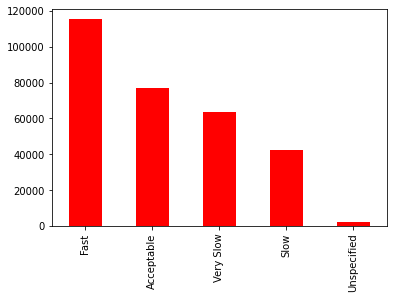

In [14]:
# 3.Provide major insights/patterns that you can offer in a visual format (graphs or tables); 
#at least 4 major conclusions that you can come up with after generic data mining.
barplot.plot(kind='bar',color='r') # Conclusion 1: most of the requests has resolved very fast 

In [15]:
Customer_data.groupby('Status').size()

Status
Assigned       786
Closed      298471
Draft            2
Open          1439
dtype: int64

<AxesSubplot:>

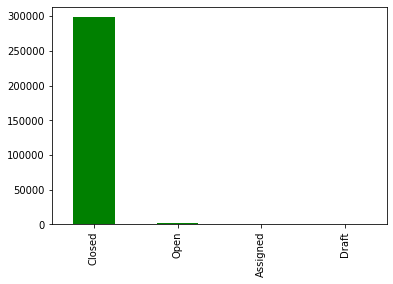

In [16]:
Customer_data['Status'].value_counts().plot.bar(color='g')
# Conclusion 2: most of the requests are already closed i.e 298471 and open requests are only 1439

In [17]:
Customer_data.groupby('Park Borough').size()

Park Borough
BRONX            40702
BROOKLYN         98307
MANHATTAN        66131
QUEENS           80641
STATEN ISLAND    12343
Unspecified       2574
dtype: int64

<AxesSubplot:>

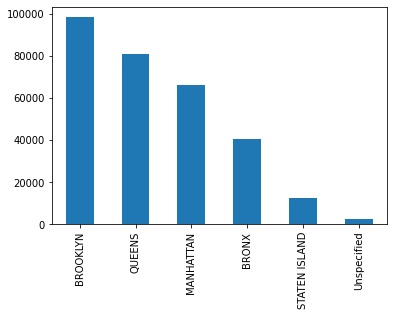

In [18]:
Customer_data1['Park Borough'].value_counts().plot.bar()
# Conclusion 3: The Customer Service requests are much higher from the city BROOKLYN and then from QUEENS 

In [19]:
# Created Series for months in text format
monthSeries = pd.Series({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
print(monthSeries)
print(monthSeries[12])

1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object
Dec


In [20]:
import datetime
def getMonth(crDate):
    a = str(crDate)
    date1 = datetime.datetime.strptime(a, "%Y-%m-%d %H:%M:%S")
    return monthSeries[date1.month]

# Test function getMonth
print(Customer_data['Created Date'][1])
print(getMonth(Customer_data['Created Date'][1]))

2015-12-31 23:59:00
Dec


In [21]:
Customer_data['Created_month']=Customer_data['Created Date'].apply(getMonth)

In [22]:
Customer_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Hours,Request_Closing_Time_Category,Created_month
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00,0.93,Fast,Dec
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00,1.45,Fast,Dec
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00,4.87,Slow,Dec
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00,7.77,Very Slow,Dec
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00,3.47,Acceptable,Dec


In [23]:
plot2=Customer_data['Created_month'].value_counts()

<AxesSubplot:>

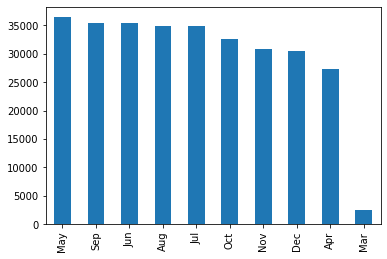

In [24]:
plot2.plot.bar()
# Conclusion 4: Service requestes are not there from months Jan and Feb  
#and very low in the month of march as compared to other months 

In [25]:
# To confirm doubt of January doesn't have any value, we used original dataframe and check if any entry for Jan month
Customer_data1[Customer_data1['Created Date'].str.startswith('02/')]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [26]:
complaint_count=pd.crosstab(Customer_data['Complaint Type'],Customer_data['Complaint Type']).max().sort_values(ascending=False)
complaint_count

Complaint Type
Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
dtype: int64

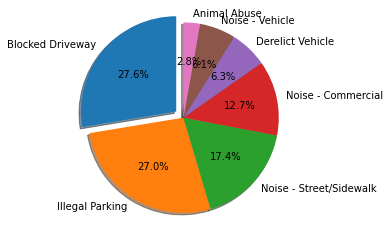

In [27]:
complaint_count[0:7]
labels = 'Blocked Driveway','Illegal Parking','Noise - Street/Sidewalk','Noise - Commercial','Derelict Vehicle','Noise - Vehicle','Animal Abuse'
size = [77044,75361,48612,35577,17718,17083,7778]
explode=(0.1,0,0,0,0,0,0) #only "explode" the first slice i.e 'Blocked Driveway'
fig1, ax1 = plt.subplots()
ax1.pie(size, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()
# Conclusion 5: 27.6 % complaints are of Blocked Driveway type

# 4.Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [28]:
##Quetion 4: Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
Customer_data['City'].isnull().sum()

2614

In [29]:
Customer_data['City'].fillna('Not specified', inplace= True)
Customer_data['City'].head(10)

0       NEW YORK
1        ASTORIA
2          BRONX
3          BRONX
4       ELMHURST
5       BROOKLYN
6       NEW YORK
7          BRONX
8    KEW GARDENS
9       BROOKLYN
Name: City, dtype: object

In [30]:
Customer_data_grouped=Customer_data.groupby(['City','Complaint Type'])
Customer_data_grouped.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Hours,Request_Closing_Time_Category,Created_month
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00,0.93,Fast,Dec
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00,1.45,Fast,Dec
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00,4.87,Slow,Dec
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00,7.77,Very Slow,Dec
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00,3.47,Acceptable,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299347,30291030,2015-03-30 17:26:00,2015-03-30 23:19:00,NYPD,New York City Police Department,Posting Advertisement,Vehicle,Street/Sidewalk,11103.0,NaN,...,Unspecified,Unspecified,N,40.764590,-73.904513,"(40.76459027028896, -73.90451320724391)",0 days 05:53:00,5.88,Slow,Mar
299367,30293924,2015-03-30 17:00:00,2015-03-30 18:48:00,NYPD,New York City Police Department,Disorderly Youth,Playing in Unsuitable Place,Street/Sidewalk,11363.0,220 FOREST ROAD,...,Unspecified,Unspecified,N,40.773052,-73.749109,"(40.77305203079431, -73.7491087819053)",0 days 01:48:00,1.80,Fast,Mar
299397,30292605,2015-03-30 16:15:00,2015-03-30 23:17:00,NYPD,New York City Police Department,Graffiti,Police Report Requested,Residential Building/House,11106.0,32-86 34 STREET,...,Unspecified,Unspecified,N,40.760383,-73.923387,"(40.76038295135621, -73.92338726201558)",0 days 07:02:00,7.03,Very Slow,Mar
299483,30294663,2015-03-30 14:11:00,2015-03-30 17:21:00,NYPD,New York City Police Department,Graffiti,Police Report Requested,Store/Commercial,11377.0,34-39 56 STREET,...,Unspecified,Unspecified,N,40.752248,-73.905379,"(40.752247862227776, -73.90537908048168)",0 days 03:10:00,3.17,Acceptable,Mar


In [31]:
Customer_data_grouped=Customer_data.groupby(['City','Complaint Type']).agg({'Request_Closing_Hours':'mean'})
Customer_data_grouped

Request_Closing_Hours
City     Complaint Type                                
ARVERNE  Animal Abuse                          2.153947
         Blocked Driveway                      2.527429
         Derelict Vehicle                      2.965185
         Disorderly Youth                      3.595000
         Drinking                              0.250000
...                                                 ...
Woodside Blocked Driveway                      6.401818
         Derelict Vehicle                      4.965000
         Illegal Parking                       5.220200
         Noise - Commercial                    2.390000
         Noise - Street/Sidewalk               3.414000

[782 rows x 1 columns]

In [32]:
Customer_data_grouped['Request_Closing_Hours'].isnull().sum()

4

In [33]:
Customer_data_grouped_drpna=Customer_data_grouped['Request_Closing_Hours'].dropna()
Customer_data_grouped_drpna

City      Complaint Type         
ARVERNE   Animal Abuse               2.153947
          Blocked Driveway           2.527429
          Derelict Vehicle           2.965185
          Disorderly Youth           3.595000
          Drinking                   0.250000
                                       ...   
Woodside  Blocked Driveway           6.401818
          Derelict Vehicle           4.965000
          Illegal Parking            5.220200
          Noise - Commercial         2.390000
          Noise - Street/Sidewalk    3.414000
Name: Request_Closing_Hours, Length: 778, dtype: float64

In [34]:
Customer_data_sort=Customer_data_grouped.sort_values(['City','Request_Closing_Hours'])
Customer_data_sort.head(30)

Request_Closing_Hours
City    Complaint Type                                  
ARVERNE Drinking                                0.250000
        Vending                                 0.480000
        Urinating in Public                     0.700000
        Panhandling                             1.030000
        Noise - Park                            1.285000
        Graffiti                                1.530000
        Noise - House of Worship                1.561818
        Homeless Encampment                     1.817500
        Noise - Vehicle                         1.861429
        Noise - Street/Sidewalk                 1.991379
        Animal Abuse                            2.153947
        Noise - Commercial                      2.295000
        Illegal Parking                         2.316897
        Blocked Driveway                        2.527429
        Derelict Vehicle                        2.965185
        Disorderly Youth                        3.595000
ASTORIA Panhandling                             1.150000
        Bike/Roller/Skate Chronic               1.738000
        Noise - House of Worship                2.024211
        Illegal Fireworks                       2.775000
        Disorderly Youth                        2.903333
        Noise - Park                            2.995410
        Noise - Commercial                      3.132738
        Noise - Street/Sidewalk                 3.450829
        Noise - Vehicle                         3.508725
        Urinating in Public                     4.626667
        Drinking                                4.720857
        Blocked Driveway                        4.815886
        Illegal Parking                         4.833249
        Homeless Encampment                     4.916562

#Question 5: Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

#1)Whether the average response time across complaint types is similar or not (overall)
H0= the average response time across complaint types is similar
H1= Not similar


In [35]:
import scipy.stats as st
import math


In [36]:
Customer_data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [37]:
Top6_complaints_type= Customer_data['Complaint Type'].value_counts()[:6]
Top6_complaints_type

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Name: Complaint Type, dtype: int64

In [38]:
Top6_complaints_type_names=Top6_complaints_type.index
Top6_complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object')

In [39]:
data=Customer_data.loc[Customer_data['Complaint Type'].isin(Top6_complaints_type_names),['Complaint Type','Request_Closing_Hours']]
data.head(10)

,Complaint Type,Request_Closing_Hours
0,Noise - Street/Sidewalk,0.93
1,Blocked Driveway,1.45
2,Blocked Driveway,4.87
3,Illegal Parking,7.77
4,Illegal Parking,3.47
5,Illegal Parking,1.90
6,Illegal Parking,1.97
7,Blocked Driveway,1.80
8,Illegal Parking,8.57
9,Blocked Driveway,1.40


In [40]:
data.isnull().sum()

Complaint Type              0
Request_Closing_Hours    2109
dtype: int64

In [41]:
data.dropna(how='any', inplace=True)
data.isnull().sum()

Complaint Type           0
Request_Closing_Hours    0
dtype: int64

In [42]:
s1 = data[data['Complaint Type'] == Top6_complaints_type_names[0]].Request_Closing_Hours
s1.head()

1     1.45
2     4.87
7     1.80
9     1.40
10    7.82
Name: Request_Closing_Hours, dtype: float64

In [43]:
s2= data[data['Complaint Type'] == Top6_complaints_type_names[1]].Request_Closing_Hours
s2.head()

3    7.77
4    3.47
5    1.90
6    1.97
8    8.57
Name: Request_Closing_Hours, dtype: float64

In [44]:
s3= data[data['Complaint Type'] == Top6_complaints_type_names[2]].Request_Closing_Hours
s3.head()

0     0.93
12    2.48
19    0.80
38    0.50
54    1.50
Name: Request_Closing_Hours, dtype: float64

In [45]:
st.f_oneway(s1, s2, s3) # ANOVA Test

F_onewayResult(statistic=812.7246912972842, pvalue=0.0)

We can see pvalue is less than 0.05 so we reject null hypothesis and average response time is not same.

#Are the type of complaint or service requested and location related?

#H0 : 2 categories - Complain Type and Location is independent means not related
#Ha : 2 categories - Complain Type and Location is dependent means related

In [46]:
top5_location = Customer_data['City'].value_counts()[:5]
top5_location

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

In [47]:
top5_location_names=top5_location.index
top5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [48]:
data2=Customer_data.loc[Customer_data['Complaint Type'].isin(Top6_complaints_type_names)&(Customer_data['City'].isin(top5_location_names)),['Complaint Type','City']]
data2.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK


In [49]:
chi_test=pd.crosstab(data2['Complaint Type'], data2['City'], margins=True)
chi_test

City,BRONX,BROOKLYN,JAMAICA,NEW YORK,STATEN ISLAND,All
Complaint Type,,,,,,
Blocked Driveway,12755,28148,2818,2072,2142,47935
Derelict Vehicle,1953,5181,954,537,1766,10391
Illegal Parking,7859,27462,1421,12128,4886,53756
Noise - Commercial,2434,11463,429,14550,678,29554
Noise - Street/Sidewalk,8892,13356,339,20433,819,43839
Noise - Vehicle,3396,5177,302,5485,356,14716
All,37289,90787,6263,55205,10647,200191


In [50]:
ch2, p_value, df, exp_frq = st.chi2_contingency(chi_test) # Chi square test

In [51]:
print(ch2)
print(p_value)

41592.20529791126
0.0


###  We can see pvalue is less than 0.05 so we reject null hypothesis means Complain Type and Location is dependent.

## Thank You...!!